In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load your dataset
df = pd.read_csv('C:/Users/Chiranjeevi/OneDrive/Desktop/3rd SEM/ML/Lab/salary_data.csv')

In [3]:
df.head(5)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


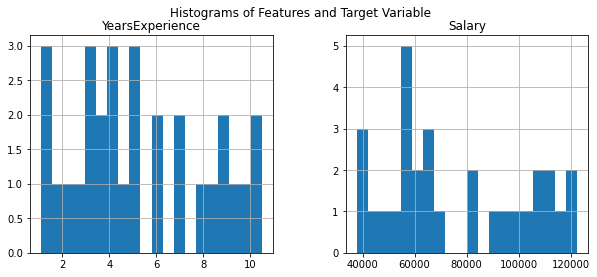

In [4]:
# Visualize the data using histograms
df.hist(bins=20, figsize=(10, 4))
plt.suptitle('Histograms of Features and Target Variable')
plt.show()

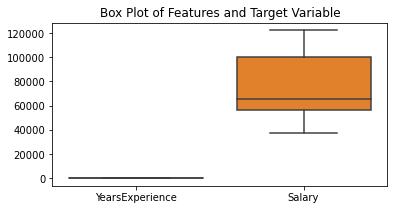

In [5]:
# Visualize the data using box plots
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, orient='v')
plt.title('Box Plot of Features and Target Variable')
plt.show()

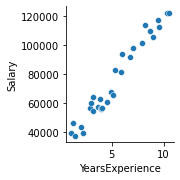

In [6]:
# Visualize the data
sns.pairplot(df, x_vars=['YearsExperience'], y_vars='Salary', kind='scatter')
plt.show()

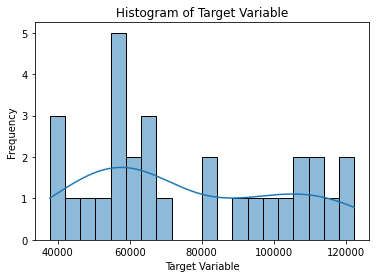

In [7]:
# Plot histogram of the target variable
plt.figure(figsize=(6, 4))
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Histogram of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

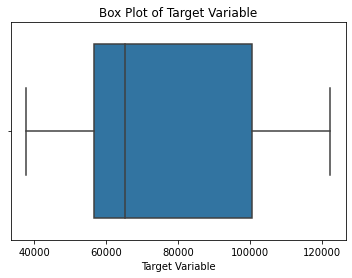

In [8]:
# Box plot to identify outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Salary'])
plt.title('Box Plot of Target Variable')
plt.xlabel('Target Variable')
plt.show()

In [9]:
# Identify features (X) and target variable (y)
X = df[['YearsExperience']]  
y = df['Salary']

In [10]:
# Detect outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

In [11]:
# Print and visualize outliers
print("Outliers:")
print(df[outliers])

Outliers:
Empty DataFrame
Columns: [YearsExperience, Salary]
Index: []


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the linear regression model
model = LinearRegression()

In [14]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [16]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 49830096.85590839
R-squared: 0.9024461774180497


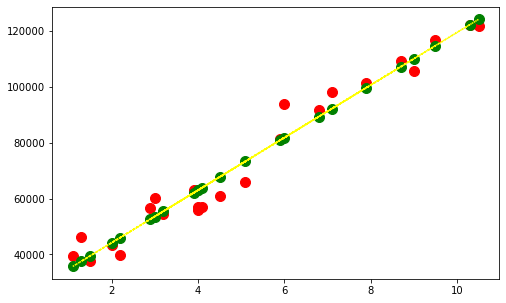

In [18]:
# plot the training samples - x and y
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='red', s=100, label='ActualPoints')
plt.scatter(X_train, model.predict(X_train), color='green', s=100, label='PredictedPoints')

# line of regression
plt.plot(X_train, model.predict(X_train), linestyle="dotted", color='yellow')
plt.show()

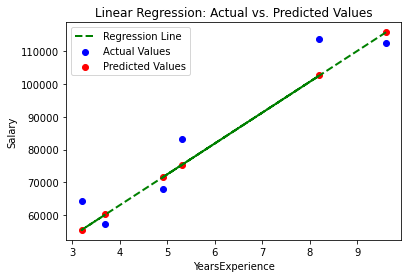

In [19]:
# Visualize the predictions vs. actual values
plt.scatter(X_test['YearsExperience'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['YearsExperience'], y_pred, color='red', label='Predicted Values')
plt.plot(X_test['YearsExperience'], model.predict(X_test), color='green', linestyle='dashed', linewidth=2, label='Regression Line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.legend()
plt.show()

In [20]:
scores = []
for i in range(5000):
    # Split the dataset into training and testing sets
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=i)
    model1 = LinearRegression()
    model1.fit(X_train1, y_train1)
    ypred1 = model1.predict(X_test1)
    scores.append(r2_score(y_test1, ypred1))
# print(scores)
print(np.max(scores))
print(np.argmax(scores))

0.9974925617006956
4697
